In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

obj = json.load(open('results.json'))
obj

[{'round': 1, 'winner': 'win', 'roll': 75, 'participants': ['win']},
 {'round': 2, 'winner': 'pi', 'roll': 39, 'participants': ['pi']},
 {'round': 3,
  'winner': "'Nobody participated'",
  'roll': 0,
  'participants': []},
 {'round': 4, 'winner': 'server', 'roll': 68, 'participants': ['server']},
 {'round': 5,
  'winner': 'server',
  'roll': 60,
  'participants': ['server', 'pi']},
 {'round': 6, 'winner': 'pi', 'roll': 35, 'participants': ['pi', 'win']},
 {'round': 7, 'winner': 'server', 'roll': 2, 'participants': ['server']},
 {'round': 8,
  'winner': "'Nobody participated'",
  'roll': 0,
  'participants': []},
 {'round': 9,
  'winner': 'server',
  'roll': 51,
  'participants': ['pi', 'server', 'win']},
 {'round': 10, 'winner': 'server', 'roll': 32, 'participants': ['server']},
 {'round': 11, 'winner': 'server', 'roll': 21, 'participants': ['server']},
 {'round': 12, 'winner': 'win', 'roll': 45, 'participants': ['win']},
 {'round': 13,
  'winner': 'server',
  'roll': 79,
  'participan

In [2]:
df = pd.read_json('results.json')
df

,round,winner,roll,participants
0,1,win,75,[win]
1,2,pi,39,[pi]
2,3,'Nobody participated',0,[]
3,4,server,68,[server]
4,5,server,60,"[server, pi]"
...,...,...,...,...
295,296,win,29,[win]
296,297,'Nobody participated',0,[]
297,298,server,23,[server]
298,299,pi,99,"[server, win, pi, win]"


In [3]:
participations = {"server": {0: 0, 1: 0, 2: 0}, "win": {0: 0, 1: 0, 2: 0}, "pi": {0: 0, 1: 0, 2: 0}}
for i in range(len(obj)):
    part = obj[i]['participants']
    a = {"server": 0, "win": 0, "pi": 0}
    for p in part:
        a[p] += 1
    for k, v in a.items():
        participations[k][v] += 1
participations
    

{'server': {0: 156, 1: 144, 2: 0},
 'win': {0: 202, 1: 92, 2: 6},
 'pi': {0: 151, 1: 149, 2: 0}}

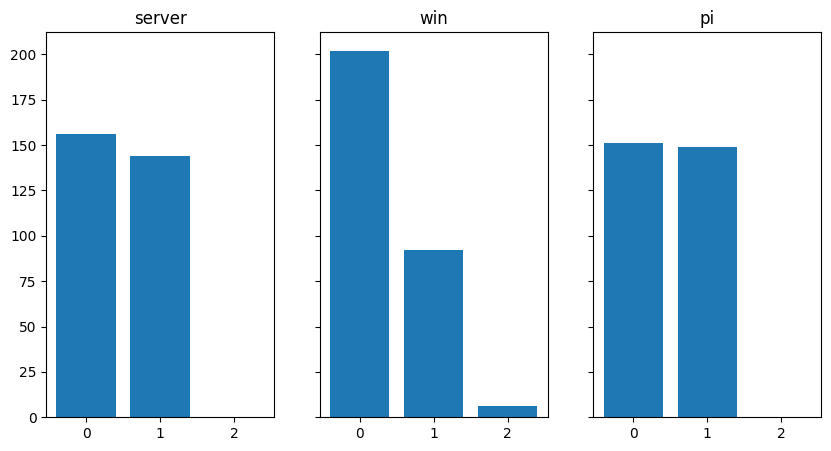

In [4]:
# plot participants into 3 subplots
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
ax[0].bar(participations['server'].keys(), participations['server'].values(), label='server')
ax[1].bar(participations['win'].keys(), participations['win'].values(), label='win')
ax[2].bar(participations['pi'].keys(), participations['pi'].values(), label='pi')

ax[0].set_title('server')
ax[1].set_title('win')
ax[2].set_title('pi')


plt.show()

Text(0.5, 1.0, 'Number of wins per player')

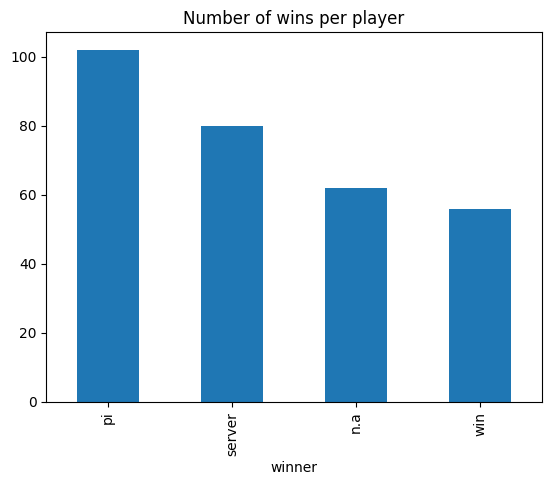

In [5]:
# barplots for the number of wins for player server, win, pi, Title "Number of wins" at the top
# replace 'Nobody participated' with 'No winner'
df["winner"].replace("'Nobody participated'", "n.a", inplace=True)
df["winner"].value_counts().plot(kind='bar')
plt.title("Number of wins per player")